# Retrieving, refining, and preserving data obtained from the Israel Airports Authority. 

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [133]:
import requests
import json


# Loading the Data

In [134]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [135]:
res = json.loads(r.content)

In [136]:
df = pd.DataFrame(res['result']['records'])

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   _id       2700 non-null   int64 
 1   CHOPER    2700 non-null   object
 2   CHFLTN    2700 non-null   object
 3   CHOPERD   2700 non-null   object
 4   CHSTOL    2700 non-null   object
 5   CHPTOL    2700 non-null   object
 6   CHAORD    2700 non-null   object
 7   CHLOC1    2700 non-null   object
 8   CHLOC1D   2700 non-null   object
 9   CHLOC1TH  2700 non-null   object
 10  CHLOC1T   2700 non-null   object
 11  CHLOC1CH  2700 non-null   object
 12  CHLOCCT   2700 non-null   object
 13  CHTERM    2700 non-null   object
 14  CHCINT    1253 non-null   object
 15  CHCKZN    1253 non-null   object
 16  CHRMINE   2700 non-null   object
 17  CHRMINH   2700 non-null   object
dtypes: int64(1), object(17)
memory usage: 379.8+ KB


In [138]:
df.shape

(2700, 18)

In [139]:
df.head(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,AA,8557,AMERICAN AIRLINES,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,LANDED,נחתה
1,2,IB,3980,IBERIA,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,LANDED,נחתה
2,3,I2,3980,IBERIA EXPRESS,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,LANDED,נחתה
3,4,LY,8388,EL AL ISRAEL AIRLINES,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,LANDED,נחתה
4,5,VY,5166,VUELING AIRLINES S.A.,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,LANDED,נחתה
5,6,NH,5160,ALL NIPPON AIRWAYS,2023-05-22T16:15:00,2023-05-22T17:32:00,D,BRU,BRUSSELS,בריסל,BRUSSELS,בלגיה,BELGIUM,3,2-5,A,DEPARTED,המריאה
6,7,SN,3290,BRUSSELS AIRLINES,2023-05-22T16:15:00,2023-05-22T17:32:00,D,BRU,BRUSSELS,בריסל,BRUSSELS,בלגיה,BELGIUM,3,2-5,A,DEPARTED,המריאה
7,8,LX,252,SWISS INT`L AIRLINES,2023-05-22T17:20:00,2023-05-22T17:33:00,A,ZRH,ZURICH,ציריך,ZURICH,שוויץ,SWITZERLAND,3,None,None,LANDED,נחתה
8,9,AA,8375,AMERICAN AIRLINES,2023-05-22T16:35:00,2023-05-22T17:35:00,A,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,None,None,LANDED,נחתה
9,10,BA,164,BRITISH AIRWAYS PLC,2023-05-22T16:40:00,2023-05-22T17:35:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,26-33,A,DEPARTED,המריאה


In [140]:
df.tail(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
2690,2691,AM,7694,AERO MEXICO,2023-05-26T17:25:00,2023-05-26T17:25:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,56-63,C,ON TIME,בזמן
2691,2692,DL,5952,DELTA AIRLINES,2023-05-26T17:25:00,2023-05-26T17:25:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,56-63,C,ON TIME,בזמן
2692,2693,IB,3980,IBERIA,2023-05-26T17:25:00,2023-05-26T17:25:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,NOT FINAL,לא סופי
2693,2694,I2,3980,IBERIA EXPRESS,2023-05-26T17:25:00,2023-05-26T17:25:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,NOT FINAL,לא סופי
2694,2695,LY,8388,EL AL ISRAEL AIRLINES,2023-05-26T17:25:00,2023-05-26T17:25:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,NOT FINAL,לא סופי
2695,2696,VS,458,VIRGIN ATLANTIC AIRWAYS,2023-05-26T17:25:00,2023-05-26T17:25:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,56-63,C,ON TIME,בזמן
2696,2697,VY,5166,VUELING AIRLINES S.A.,2023-05-26T17:25:00,2023-05-26T17:25:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,None,None,NOT FINAL,לא סופי
2697,2698,W6,8287,WIZZAIR,2023-05-26T17:25:00,2023-05-26T17:25:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,NOT FINAL,לא סופי
2698,2699,6H,991,ISRAIR AIRLINES,2023-05-26T17:25:00,2023-05-26T17:25:00,D,SSH,SHARM EL SHEIKH,שארם אל-שייח,SHARM EL SHEIKH,מצרים,EGYPT,3,2-5,A,ON TIME,בזמן
2699,2700,U8,213,TUS AIRWAYS,2023-05-26T17:30:00,2023-05-26T17:30:00,A,ATH,ATHENS,אתונה,ATHENS,יוון,GREECE,3,None,None,NOT FINAL,לא סופי


# Cleaning the Data

In [141]:
df.replace(np.NaN,'',inplace=True)

In [142]:
for column in df.columns:
    empty_rows = (df[column]== '').sum()
    total_rows = len(df[column])
    percentage = empty_rows / total_rows * 100
    print(f'{column}: {percentage:.2f}% of rows contain empty strings')

_id: 0.00% of rows contain empty strings
CHOPER: 0.00% of rows contain empty strings
CHFLTN: 0.00% of rows contain empty strings
CHOPERD: 0.00% of rows contain empty strings
CHSTOL: 0.00% of rows contain empty strings
CHPTOL: 0.00% of rows contain empty strings
CHAORD: 0.00% of rows contain empty strings
CHLOC1: 0.00% of rows contain empty strings
CHLOC1D: 0.00% of rows contain empty strings
CHLOC1TH: 0.00% of rows contain empty strings
CHLOC1T: 0.00% of rows contain empty strings
CHLOC1CH: 0.00% of rows contain empty strings
CHLOCCT: 0.00% of rows contain empty strings
CHTERM: 0.00% of rows contain empty strings
CHCINT: 53.59% of rows contain empty strings
CHCKZN: 53.59% of rows contain empty strings
CHRMINE: 0.00% of rows contain empty strings
CHRMINH: 0.00% of rows contain empty strings


In [143]:
df = df.drop('CHCINT', axis=1)
df = df.drop('CHCKZN', axis=1)
df

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHRMINE,CHRMINH
0,1,AA,8557,AMERICAN AIRLINES,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
1,2,IB,3980,IBERIA,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
2,3,I2,3980,IBERIA EXPRESS,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
3,4,LY,8388,EL AL ISRAEL AIRLINES,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
4,5,VY,5166,VUELING AIRLINES S.A.,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,2696,VS,458,VIRGIN ATLANTIC AIRWAYS,2023-05-26T17:25:00,2023-05-26T17:25:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,ON TIME,בזמן
2696,2697,VY,5166,VUELING AIRLINES S.A.,2023-05-26T17:25:00,2023-05-26T17:25:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,NOT FINAL,לא סופי
2697,2698,W6,8287,WIZZAIR,2023-05-26T17:25:00,2023-05-26T17:25:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,NOT FINAL,לא סופי
2698,2699,6H,991,ISRAIR AIRLINES,2023-05-26T17:25:00,2023-05-26T17:25:00,D,SSH,SHARM EL SHEIKH,שארם אל-שייח,SHARM EL SHEIKH,מצרים,EGYPT,3,ON TIME,בזמן


In [144]:
for column in df.columns:
    empty_rows = (df[column]== '').sum()
    total_rows = len(df[column])
    percentage = empty_rows / total_rows * 100
    print(f'{column}: {percentage:.2f}% of rows contain empty strings')

_id: 0.00% of rows contain empty strings
CHOPER: 0.00% of rows contain empty strings
CHFLTN: 0.00% of rows contain empty strings
CHOPERD: 0.00% of rows contain empty strings
CHSTOL: 0.00% of rows contain empty strings
CHPTOL: 0.00% of rows contain empty strings
CHAORD: 0.00% of rows contain empty strings
CHLOC1: 0.00% of rows contain empty strings
CHLOC1D: 0.00% of rows contain empty strings
CHLOC1TH: 0.00% of rows contain empty strings
CHLOC1T: 0.00% of rows contain empty strings
CHLOC1CH: 0.00% of rows contain empty strings
CHLOCCT: 0.00% of rows contain empty strings
CHTERM: 0.00% of rows contain empty strings
CHRMINE: 0.00% of rows contain empty strings
CHRMINH: 0.00% of rows contain empty strings


In [145]:
df.tail(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHRMINE,CHRMINH
2690,2691,AM,7694,AERO MEXICO,2023-05-26T17:25:00,2023-05-26T17:25:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,ON TIME,בזמן
2691,2692,DL,5952,DELTA AIRLINES,2023-05-26T17:25:00,2023-05-26T17:25:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,ON TIME,בזמן
2692,2693,IB,3980,IBERIA,2023-05-26T17:25:00,2023-05-26T17:25:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,NOT FINAL,לא סופי
2693,2694,I2,3980,IBERIA EXPRESS,2023-05-26T17:25:00,2023-05-26T17:25:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,NOT FINAL,לא סופי
2694,2695,LY,8388,EL AL ISRAEL AIRLINES,2023-05-26T17:25:00,2023-05-26T17:25:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,NOT FINAL,לא סופי
2695,2696,VS,458,VIRGIN ATLANTIC AIRWAYS,2023-05-26T17:25:00,2023-05-26T17:25:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,ON TIME,בזמן
2696,2697,VY,5166,VUELING AIRLINES S.A.,2023-05-26T17:25:00,2023-05-26T17:25:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,NOT FINAL,לא סופי
2697,2698,W6,8287,WIZZAIR,2023-05-26T17:25:00,2023-05-26T17:25:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,NOT FINAL,לא סופי
2698,2699,6H,991,ISRAIR AIRLINES,2023-05-26T17:25:00,2023-05-26T17:25:00,D,SSH,SHARM EL SHEIKH,שארם אל-שייח,SHARM EL SHEIKH,מצרים,EGYPT,3,ON TIME,בזמן
2699,2700,U8,213,TUS AIRWAYS,2023-05-26T17:30:00,2023-05-26T17:30:00,A,ATH,ATHENS,אתונה,ATHENS,יוון,GREECE,3,NOT FINAL,לא סופי


# Preparing to store raw data with date stamp

In [146]:
today = date.today()
date_stamp = Today.strftime("%d_%m_%Y")
date_stamp

'23_05_2023'

In [ ]:
df = df.drop('_id', axis=1)

In [151]:
df.head(10)

,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHRMINE,CHRMINH
0,AA,8557,AMERICAN AIRLINES,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
1,IB,3980,IBERIA,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
2,I2,3980,IBERIA EXPRESS,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
3,LY,8388,EL AL ISRAEL AIRLINES,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
4,VY,5166,VUELING AIRLINES S.A.,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
5,NH,5160,ALL NIPPON AIRWAYS,2023-05-22T16:15:00,2023-05-22T17:32:00,D,BRU,BRUSSELS,בריסל,BRUSSELS,בלגיה,BELGIUM,3,DEPARTED,המריאה
6,SN,3290,BRUSSELS AIRLINES,2023-05-22T16:15:00,2023-05-22T17:32:00,D,BRU,BRUSSELS,בריסל,BRUSSELS,בלגיה,BELGIUM,3,DEPARTED,המריאה
7,LX,252,SWISS INT`L AIRLINES,2023-05-22T17:20:00,2023-05-22T17:33:00,A,ZRH,ZURICH,ציריך,ZURICH,שוויץ,SWITZERLAND,3,LANDED,נחתה
8,AA,8375,AMERICAN AIRLINES,2023-05-22T16:35:00,2023-05-22T17:35:00,A,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,LANDED,נחתה
9,BA,164,BRITISH AIRWAYS PLC,2023-05-22T16:40:00,2023-05-22T17:35:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,DEPARTED,המריאה


In [153]:
df.to_csv(f'raw data {date_stamp}.csv', index=False)

# Preparing to store airlines file with date stamp

In [156]:
airlines = df[['CHOPER','CHOPERD']]
airlines

,CHOPER,CHOPERD
0,AA,AMERICAN AIRLINES
1,IB,IBERIA
2,I2,IBERIA EXPRESS
3,LY,EL AL ISRAEL AIRLINES
4,VY,VUELING AIRLINES S.A.
...,...,...
2695,VS,VIRGIN ATLANTIC AIRWAYS
2696,VY,VUELING AIRLINES S.A.
2697,W6,WIZZAIR
2698,6H,ISRAIR AIRLINES


In [157]:
airlines.drop_duplicates().reset_index(drop=True)

,CHOPER,CHOPERD
0,AA,AMERICAN AIRLINES
1,IB,IBERIA
2,I2,IBERIA EXPRESS
3,LY,EL AL ISRAEL AIRLINES
4,VY,VUELING AIRLINES S.A.
...,...,...
85,EY,ETIHAD AIRWAYS
86,P4,AIR PEACE
87,XR,CORENDON EUROPE
88,FH,FREEBIRD AIRLINES


Merging and saving with existing airlines list

In [158]:
airlines1 = pd.read_csv('airlines.csv')
airlines.info()
airlines.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHOPER   2700 non-null   object
 1   CHOPERD  2700 non-null   object
dtypes: object(2)
memory usage: 42.3+ KB


,CHOPER,CHOPERD
0,AA,AMERICAN AIRLINES
1,IB,IBERIA
2,I2,IBERIA EXPRESS
3,LY,EL AL ISRAEL AIRLINES
4,VY,VUELING AIRLINES S.A.


In [160]:
air_con = pd.concat([airlines,airlines1], axis=0, ignore_index=True).drop_duplicates()
air_con.info()
air_con.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHOPER   127 non-null    object
 1   CHOPERD  127 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


,CHOPER,CHOPERD
0,AA,AMERICAN AIRLINES
1,IB,IBERIA
2,I2,IBERIA EXPRESS
3,LY,EL AL ISRAEL AIRLINES
4,VY,VUELING AIRLINES S.A.
5,NH,ALL NIPPON AIRWAYS
6,SN,BRUSSELS AIRLINES
7,LX,SWISS INT`L AIRLINES
9,BA,BRITISH AIRWAYS PLC
11,EK,EMIRATES


In [161]:
air_con.to_csv(f'airlines {date_stamp}.csv', index= False)

Dropping the Airline name column

In [162]:
df = df.drop('CHOPERD', axis=1)
df.head()

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHRMINE,CHRMINH
0,AA,8557,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
1,IB,3980,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
2,I2,3980,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
3,LY,8388,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה
4,VY,5166,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,מדריד,MADRID,ספרד,SPAIN,3,LANDED,נחתה


# Preparing to store Airports file with date stamp

In [163]:
airports = df[['CHLOC1','CHLOC1D']]
airports.drop_duplicates().reset_index(drop=True)
airports.info()
airports.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHLOC1   2700 non-null   object
 1   CHLOC1D  2700 non-null   object
dtypes: object(2)
memory usage: 42.3+ KB


,CHLOC1,CHLOC1D
0,MAD,MADRID
1,MAD,MADRID
2,MAD,MADRID
3,MAD,MADRID
4,MAD,MADRID


Merging and saving with existing airports list

In [164]:
airports1 = pd.read_csv('airports.csv')
airports1.info()
airports1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHLOC1   165 non-null    object
 1   CHLOC1D  165 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


,CHLOC1,CHLOC1D
0,SAW,ISTANBUL-SABIHA GOKCHEN
1,PRG,PRAGUE-RUZYNE
2,IST,ISTANBUL
3,ZRH,ZURICH
4,SOF,SOFIA


In [166]:
airp_con = pd.concat([airports,airports1], axis=0, ignore_index=True).drop_duplicates()
airp_con.info()
airp_con.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 2864
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CHLOC1   202 non-null    object
 1   CHLOC1D  202 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB


,CHLOC1,CHLOC1D
0,MAD,MADRID
5,BRU,BRUSSELS
7,ZRH,ZURICH
8,CDG,PARIS-CHARLES DE GAULLE
9,LHR,LONDON - HEATHROW
11,DXB,DUBAI
12,IST,ISTANBUL
15,FCO,ROME - FIUMICINO
16,ORY,PARIS-ORLY
17,ATH,ATHENS


In [167]:
airp_con.to_csv(f'airports {date_stamp}.csv', index=False)

Dropping unecessary columns

In [ ]:
df = df.drop(['CHLOC1TH','CHLOC1CH','CHRMINH'], axis=1)

In [172]:
df.head()

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1T,CHLOCCT,CHTERM,CHRMINE
0,AA,8557,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,MADRID,SPAIN,3,LANDED
1,IB,3980,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,MADRID,SPAIN,3,LANDED
2,I2,3980,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,MADRID,SPAIN,3,LANDED
3,LY,8388,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,MADRID,SPAIN,3,LANDED
4,VY,5166,2023-05-22T17:25:00,2023-05-22T17:31:00,A,MAD,MADRID,MADRID,SPAIN,3,LANDED


# Preparing to store a clean data file with date stamp

In [173]:
df.rename(columns={'CHOPER':'Airline', 'CHFLTN':'FlightNum', 'CHSTOL':'PlanTime', 'CHPTOL':'ActualTime', 'CHAORD':'Direction', 'CHLOC1':'Airport', 'CHLOC1T':'City', 'CHLOCCT':'Country', 'CHTERM':'Terminal', 'CHRMINE':'Status'}, inplace=True)

df = df.drop('CHLOC1D', axis= 1)
df.columns

Index(['Airline', 'FlightNum', 'PlanTime', 'ActualTime', 'Direction',
       'Airport', 'City', 'Country', 'Terminal', 'Status'],
      dtype='object')

In [174]:
df['PlanTime'] = pd.to_datetime(df['PlanTime'])
df['ActualTime'] = pd.to_datetime(df['ActualTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Airline     2700 non-null   object        
 1   FlightNum   2700 non-null   object        
 2   PlanTime    2700 non-null   datetime64[ns]
 3   ActualTime  2700 non-null   datetime64[ns]
 4   Direction   2700 non-null   object        
 5   Airport     2700 non-null   object        
 6   City        2700 non-null   object        
 7   Country     2700 non-null   object        
 8   Terminal    2700 non-null   object        
 9   Status      2700 non-null   object        
dtypes: datetime64[ns](2), object(8)
memory usage: 211.1+ KB


In [175]:
df.to_csv(f'cleandata {date_stamp}.csv',index=False)

# Preparing to store a final file with date stamp which includes Departed, Landed and Cancelled flights only

Merging and saving with existing data

In [177]:
final = pd.read_csv('final.csv')
final.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
0,LY,842,2022-03-07 16:00:00,2022-03-07 17:04:00,A,LGG,LIEGE,BELGIUM,3,LANDED
1,AA,146,2022-03-07 17:15:00,2022-03-07 17:05:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED
2,USF,RCH18,2022-03-07 17:15:00,2022-03-07 17:05:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED


In [178]:
final_status = ['LANDED', 'DEPARTED', 'CANCELLED']
finaldf = df[df.Status.isin(final_status)]
finaldf.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
0,AA,8557,2023-05-22 17:25:00,2023-05-22 17:31:00,A,MAD,MADRID,SPAIN,3,LANDED
1,IB,3980,2023-05-22 17:25:00,2023-05-22 17:31:00,A,MAD,MADRID,SPAIN,3,LANDED
2,I2,3980,2023-05-22 17:25:00,2023-05-22 17:31:00,A,MAD,MADRID,SPAIN,3,LANDED
3,LY,8388,2023-05-22 17:25:00,2023-05-22 17:31:00,A,MAD,MADRID,SPAIN,3,LANDED
4,VY,5166,2023-05-22 17:25:00,2023-05-22 17:31:00,A,MAD,MADRID,SPAIN,3,LANDED


In [181]:
final_con = pd.concat([final,finaldf], axis=0, ignore_index=True).drop_duplicates()
final_con.info()
final_con.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321 entries, 0 to 1322
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Airline     1321 non-null   object
 1   FlightNum   1321 non-null   object
 2   PlanTime    1321 non-null   object
 3   ActualTime  1321 non-null   object
 4   Direction   1321 non-null   object
 5   Airport     1321 non-null   object
 6   City        1321 non-null   object
 7   Country     1321 non-null   object
 8   Terminal    1321 non-null   object
 9   Status      1321 non-null   object
dtypes: object(10)
memory usage: 113.5+ KB


,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
0,LY,842,2022-03-07 16:00:00,2022-03-07 17:04:00,A,LGG,LIEGE,BELGIUM,3,LANDED
1,AA,146,2022-03-07 17:15:00,2022-03-07 17:05:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED
2,USF,RCH18,2022-03-07 17:15:00,2022-03-07 17:05:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED
5,AA,8379,2022-03-07 17:00:00,2022-03-07 17:10:00,A,AMS,AMSTERDAM,NETHERLANDS,3,LANDED
6,LY,338,2022-03-07 17:00:00,2022-03-07 17:10:00,A,AMS,AMSTERDAM,NETHERLANDS,3,LANDED
7,LAU,9HSIS,2022-03-07 17:00:00,2022-03-07 17:15:00,D,WAW,WARSAW,POLAND,3,DEPARTED
8,460,4XCMC,2022-03-07 17:00:00,2022-03-07 17:18:00,D,BCM,BACAU,ROMANIA,3,DEPARTED
9,6H,665,2022-03-07 17:20:00,2022-03-07 17:20:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,CANCELED


In [182]:
final_con.to_csv(f'final {date_stamp}.csv', index=False)

# Adding a new column for Delay in minutes

In [185]:
df['Delay'] = (df['ActualTime'] - df['PlanTime']).astype('timedelta64[m]')

In [186]:
df.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,Delay
0,AA,8557,2023-05-22 17:25:00,2023-05-22 17:31:00,A,MAD,MADRID,SPAIN,3,LANDED,6.0
1,IB,3980,2023-05-22 17:25:00,2023-05-22 17:31:00,A,MAD,MADRID,SPAIN,3,LANDED,6.0
2,I2,3980,2023-05-22 17:25:00,2023-05-22 17:31:00,A,MAD,MADRID,SPAIN,3,LANDED,6.0
3,LY,8388,2023-05-22 17:25:00,2023-05-22 17:31:00,A,MAD,MADRID,SPAIN,3,LANDED,6.0
4,VY,5166,2023-05-22 17:25:00,2023-05-22 17:31:00,A,MAD,MADRID,SPAIN,3,LANDED,6.0


Checking what is the average delay for departed flights

In [187]:
departed = df[df['Status']== 'DEPARTED']
departed.Delay.mean()

33.831831831831835

Displaying the total delay distribution (Airlines , Terminals, Date)

In [189]:
total_delay_distribution = df.groupby(['Airline','Terminal','ActualTime']).agg({'Delay': 'sum'})
total_delay_distribution.head(10)

Delay
Airline Terminal ActualTime                
3F      3        2023-05-23 18:30:00    0.0
                 2023-05-23 19:30:00    0.0
5F      3        2023-05-23 18:02:00  152.0
                 2023-05-23 18:45:00  145.0
                 2023-05-25 15:35:00    0.0
                 2023-05-25 16:35:00    0.0
5W      3        2023-05-23 10:20:00  -30.0
                 2023-05-23 12:08:00   28.0
                 2023-05-24 09:10:00    0.0
                 2023-05-24 10:00:00    0.0

# Visualizations

# 1: Top 10 Airlines with most Departures

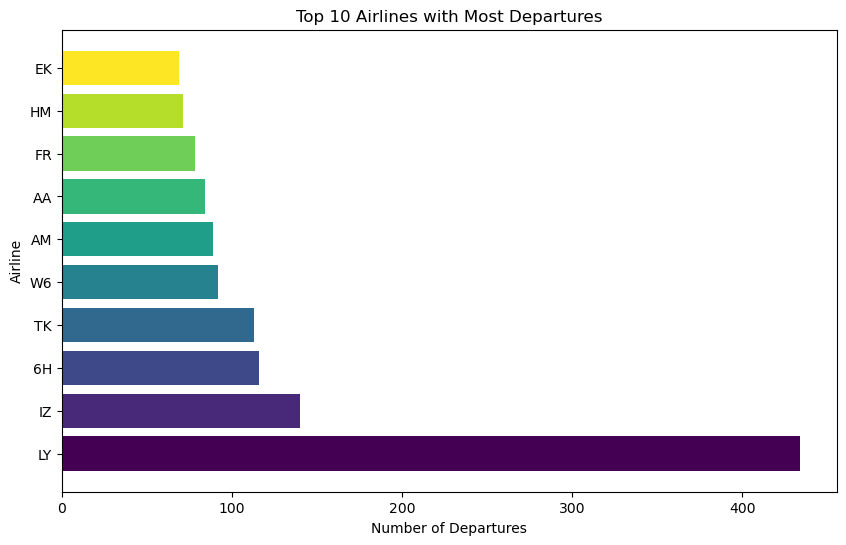

In [191]:
departures_by_airline = df['Airline'].value_counts().nlargest(10)

colors = plt.cm.viridis(np.linspace(0, 1, len(departures_by_airline)))

plt.figure(figsize=(10, 6))
plt.barh(departures_by_airline.index, departures_by_airline.values, color=colors)
plt.xlabel('Number of Departures')
plt.ylabel('Airline')
plt.title('Top 10 Airlines with Most Departures')
plt.show()



* This bar plot allows you to compare the number of departures for each airline. You can identify airlines with the highest number of departures and estimate their level of activity.

# 2: Average Delay Time by Airline (Top 10)

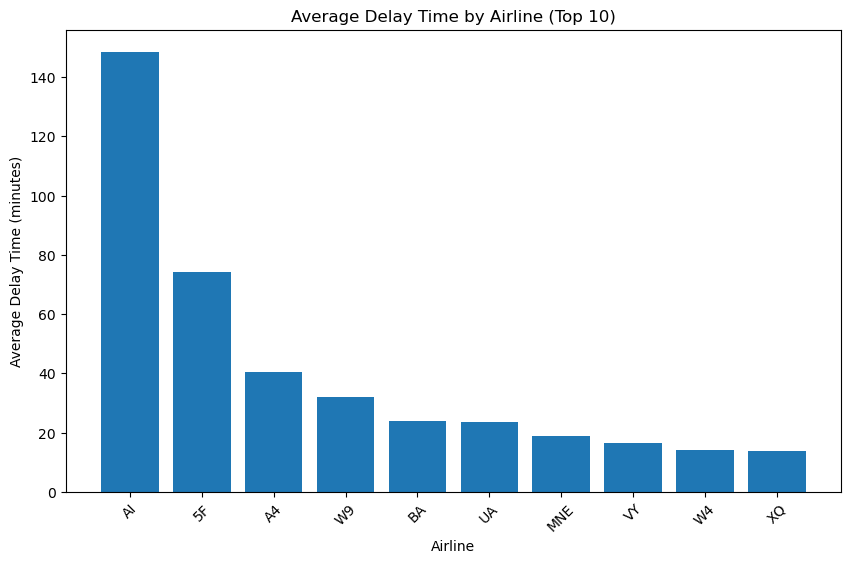

In [203]:
import matplotlib.pyplot as plt

# Calculate the average delay time by airline
average_delay_by_airline = df.groupby('Airline')['Delay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(average_delay_by_airline.index, average_delay_by_airline.values)
plt.xlabel('Airline')
plt.ylabel('Average Delay Time (minutes)')
plt.title('Average Delay Time by Airline (Top 10)')
plt.xticks(rotation=45)
plt.show()


* This bar plot allows you to compare airlines based on their average delay time. You can identify airlines with higher or lower average delays and review their performance.